In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from scipy import stats


In [75]:
!pip install statsmodels
import statsmodels.api as sm
from statsmodels.distributions.mixture_rvs import mixture_rvs

In [76]:
geo_df = pd.read_csv("/content/drive/MyDrive/ProjectGeodata/refinded_geo_dataset.csv", index_col="Unnamed: 0")

In [77]:
#ancoring
top_y = 55.12
left_x = 72.99

bottom_y = 54.80
right_x = 73.67

y_side = 35600
x_side = 43400

In [78]:
geo_df

,FORECAST_DATE,TYPE_BASIS,LATITUDE,LONGITUDE,COMPLETED,NOT_COMPLETED,x_cord,y_cord
0,2022-03-11,0,54.989735,73.284150,1,0,18773.691176,21108.01875
1,2022-03-11,0,55.016132,73.195114,1,0,13091.099412,24044.68500
2,2022-03-11,0,55.037613,73.268270,1,0,17760.173529,26434.44625
3,2022-03-11,0,55.030422,73.330430,1,0,21727.444118,25634.44750
4,2022-03-11,0,55.037056,73.274660,1,0,18168.005882,26372.48000
...,...,...,...,...,...,...,...,...
292501,2023-09-04,1,54.980915,73.321530,1,0,21159.414706,20126.79375
292502,2023-09-04,1,54.974968,73.360000,1,0,23614.705882,19465.19000
292503,2023-09-04,1,54.981842,73.325610,1,0,21419.814706,20229.92250
292504,2023-09-04,1,54.951990,73.462280,1,0,30142.576471,16908.88750


In [79]:
all_dates_of_geoset = geo_df["FORECAST_DATE"].unique()
points_array = np.array(((geo_df["x_cord"]),(geo_df["y_cord"]) ))
points_array = points_array.T

In [80]:
#sm.nonparametric.KDEMultivariate(points_array,var_type = 'uu', bw = "cv_ml")

In [81]:
points_array.shape

(180700, 2)

In [82]:
x_cords_by_dates = geo_df.groupby("FORECAST_DATE")["x_cord"].apply(list).to_dict()
y_cords_by_dates = geo_df.groupby("FORECAST_DATE")["y_cord"].apply(list).to_dict()

In [83]:
list(x_cords_by_dates.keys())[0]

'2022-01-04'

In [84]:
scatter_over_days_tensor = []
for date_key_item in x_cords_by_dates:
  tmp_x_coords_on_day = x_cords_by_dates[date_key_item]
  tmp_y_coords_on_day = y_cords_by_dates[date_key_item]
  scatter_set = np.array((tmp_x_coords_on_day, tmp_y_coords_on_day))
  scatter_over_days_tensor.append(scatter_set)
scatter_over_dates_dict = res = {list(x_cords_by_dates.keys())[i]: scatter_over_days_tensor[i] for i in range(len(scatter_over_days_tensor))}

In [85]:
scatter_over_dates_dict["2022-01-04"].shape

(2, 22)

In [86]:
x_cords_by_dates["2022-01-04"]

[24990.102941176818,
 24990.102941176818,
 30057.37205882325,
 24990.102941176818,
 25174.55294117641,
 27019.37205882401,
 18833.68529411757,
 24370.376470588697,
 24990.102941176818,
 24990.102941176818,
 29401.96823529424,
 25030.311764706294,
 30057.37205882325,
 27019.37205882401,
 24552.592647059075,
 24370.376470588697,
 22759.21529411808,
 19510.85294117638,
 24370.376470588697,
 18833.68529411757,
 18944.10000000051,
 25029.290588235566]

In [87]:
def histograms_over_day_generator(scatter_over_days_data):
  heatmap_tensor = []
  tmp_histogram = np.histogram2d(scatter_over_days_data[0][0],scatter_over_days_data[0][1], bins = (50,50))
  tmp_histogram_vals = tmp_histogram[0]
  tmp_histogram_bins = tmp_histogram[1]
  heatmap_tensor.append(tmp_histogram_vals)
  for i in range(len(scatter_over_days_data)):
    tmp_histogram = np.histogram2d(scatter_over_days_data[i][0], scatter_over_days_data[i][1], bins = tmp_histogram_bins)
    tmp_histogram_vals = tmp_histogram[0]
    tmp_histogram_bins = tmp_histogram[1]
    heatmap_tensor.append(tmp_histogram_vals)
  heatmap_tensor = np.array(heatmap_tensor[1::])
  return heatmap_tensor

In [88]:
my_heatmap_tensor = histograms_over_day_generator(scatter_over_days_tensor)

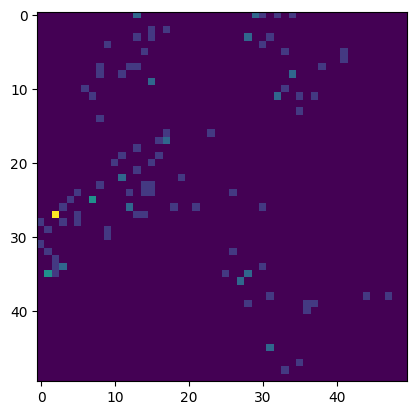

In [89]:
plt.imshow(my_heatmap_tensor[322,:,:])

<Axes: >

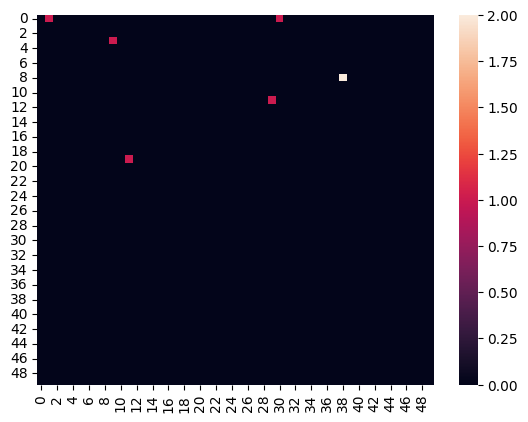

In [90]:
sns.heatmap(my_heatmap_tensor[25,:,:])

In [91]:
def generate_sample_given_scatter_tensor_slice(scatter_dict, dates_list, sample_size):
  total_scatter = np.array(((0,0),(0,0))).T

  for date in dates_list:
    total_scatter = np.hstack((total_scatter, scatter_dict[date]))
  print(total_scatter.shape)
  random_sample_bstrap = np.random.randint(low = 2, high = total_scatter.shape[1]-1, size = sample_size)
  return total_scatter[:,random_sample_bstrap]



In [126]:
some_dates_list = list(x_cords_by_dates.keys())[490:550:2]

In [137]:
list(x_cords_by_dates.keys())[557]

'2023-07-24'

In [131]:
some_sample = generate_sample_given_scatter_tensor_slice(scatter_over_dates_dict, dates_list=some_dates_list, sample_size=942)

(2, 14990)


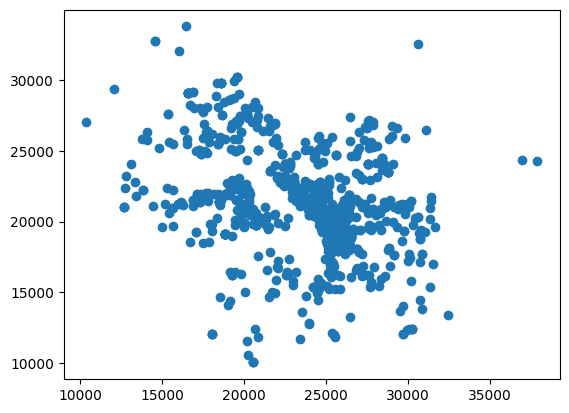

In [132]:
plt.scatter(x = some_sample[0,:], y = some_sample[1,:])

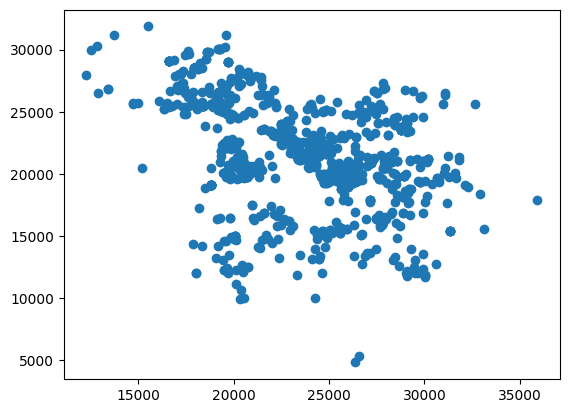

In [128]:
plt.scatter(scatter_over_days_tensor[557][0],scatter_over_days_tensor[557][1])

In [140]:
some_sample.shape

(2, 942)

In [141]:
scatter_over_days_tensor[557].shape

(2, 942)

In [ ]:
top_y = 55.12
left_x = 72.99

bottom_y = 54.80
right_x = 73.67

y_side = 35600
x_side = 43400

In [151]:
try_one_x = ((some_sample[0]/x_side)*(right_x - left_x) + left_x)
try_one_y = ((some_sample[1]/y_side)*(top_y - bottom_y) + bottom_y)

In [160]:
try_two_x = ((scatter_over_days_tensor[557][0]/x_side)*(right_x - left_x) + left_x)
try_two_y = ((scatter_over_days_tensor[557][1]/y_side)*(top_y - bottom_y) + bottom_y)

In [ ]:
pd.DataFrame(scatter_over_days_tensor[557].T)

In [153]:
geo_df.head(1)

,FORECAST_DATE,TYPE_BASIS,LATITUDE,LONGITUDE,COMPLETED,NOT_COMPLETED,x_cord,y_cord
0,2022-03-11,0,54.989735,73.28415,1,0,18773.691176,21108.01875


In [159]:
artificial_day = pd.DataFrame(np.array((try_one_y, try_one_x)).T, columns = ["LATITUDE", "LONGITUDE"])

In [161]:
real_day = pd.DataFrame(np.array((try_two_y, try_two_x)).T, columns = ["LATITUDE", "LONGITUDE"])

In [162]:
real_day

,LATITUDE,LONGITUDE
0,55.056152,73.271065
1,55.005936,73.342560
2,55.005936,73.342560
3,55.005936,73.342560
4,55.056152,73.271065
...,...,...
937,54.993050,73.424070
938,54.993073,73.368030
939,54.984016,73.425980
940,54.983050,73.398964


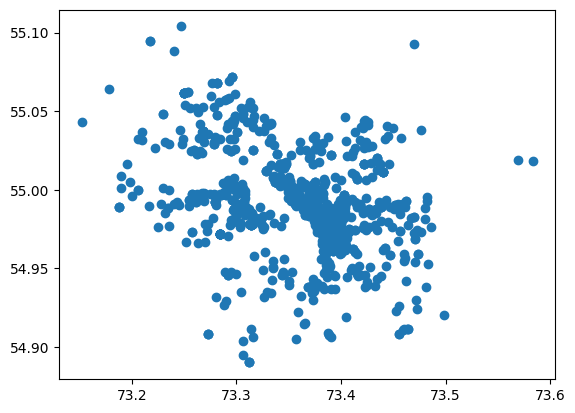

In [163]:
plt.scatter(artificial_day["LONGITUDE"], artificial_day["LATITUDE"])

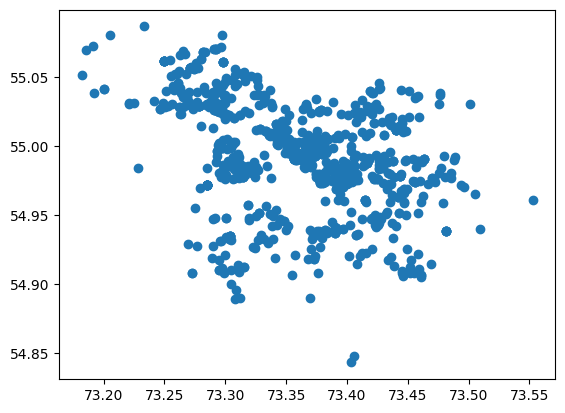

In [164]:
plt.scatter(real_day["LONGITUDE"], real_day["LATITUDE"])

In [166]:
artificial_day.to_csv("2023-07-24_forecast.csv")
real_day.to_csv("2023-07-24_ground_truth.csv")

In [167]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [179]:
geometry = [Point(xy) for xy in zip(real_day["LONGITUDE"], real_day["LATITUDE"])]

In [180]:
gdf_real = GeoDataFrame(real_day, crs="EPSG:4326", geometry=geometry)

In [181]:
gdf_real = gdf_real.drop(["LATITUDE", "LONGITUDE"], axis =1 )

In [183]:
gdf_real.to_csv("2023-07-24_ground_truth.csv")

In [184]:
geometry = [Point(xy) for xy in zip(artificial_day["LONGITUDE"], artificial_day["LATITUDE"])]
gdf_artif = GeoDataFrame(artificial_day, crs="EPSG:4326", geometry=geometry)
gdf_artif = gdf_artif.drop(["LATITUDE", "LONGITUDE"], axis =1 )
gdf_artif.to_csv("2023-07-24_forecast.csv")

In [185]:
gdf_artif

,geometry
0,POINT (73.29671 55.00045)
1,POINT (73.34191 55.00862)
2,POINT (73.38008 54.97481)
3,POINT (73.31387 54.91130)
4,POINT (73.34359 55.00661)
...,...
937,POINT (73.44223 54.96288)
938,POINT (73.39446 54.93700)
939,POINT (73.25453 54.99343)
940,POINT (73.25000 55.06146)


In [186]:
gdf_real

,geometry
0,POINT (73.27106 55.05615)
1,POINT (73.34256 55.00594)
2,POINT (73.34256 55.00594)
3,POINT (73.34256 55.00594)
4,POINT (73.27106 55.05615)
...,...
937,POINT (73.42407 54.99305)
938,POINT (73.36803 54.99307)
939,POINT (73.42598 54.98402)
940,POINT (73.39896 54.98305)
